<a href="https://colab.research.google.com/github/qahtanaa/OnSubGroupFairness/blob/main/DBSCAN_pic_circles_and_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cluster distribution:  Counter({0: 6, -1: 1})


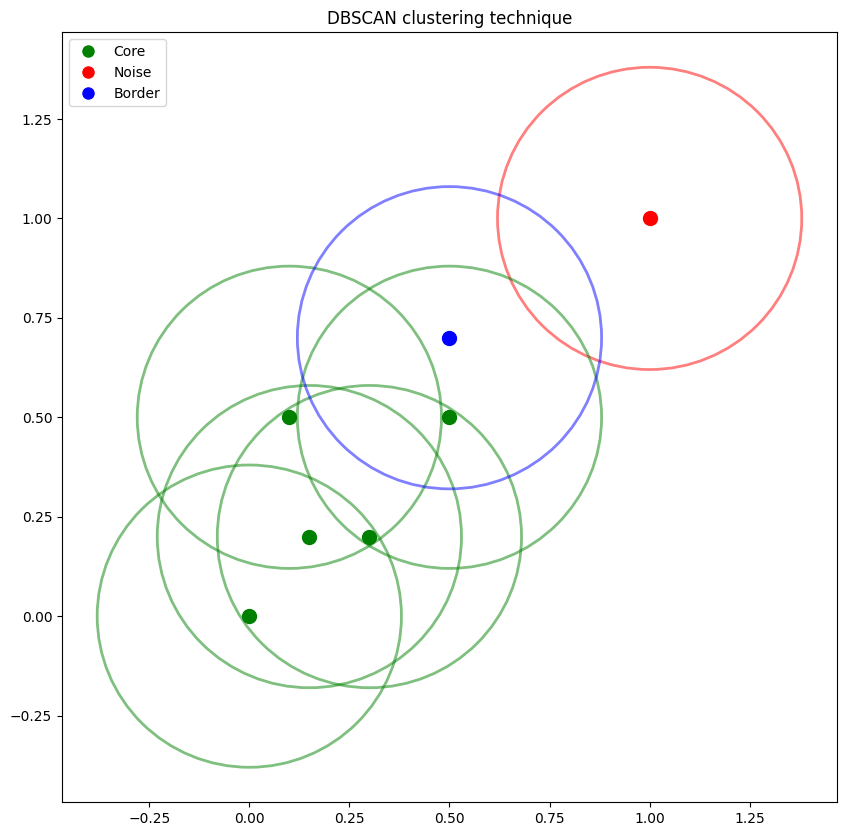

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from collections import Counter

# Generate a custom dataset with 7 points
X = np.array([
    [0, 0],
    [0.1, 0.5],
    [0.15, 0.2],
    [0.3, 0.2],
    [1, 1],
    [0.5, 0.5],
    [0.5, 0.7]
])

# Apply DBSCAN to detect clusters
eps_value = 0.38
min_samples_value = 3
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(X)

# Summarize class distribution
counter = Counter(clusters)
print("Cluster distribution: ", counter)

# Set up the plot
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Identify and plot core points, border points, and noise
core_samples_mask = np.zeros_like(clusters, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Define colors and labels for legend
colors = {'core': 'green', 'border': 'blue', 'noise': 'red'}
labels = {'core': 'Core', 'border': 'Border', 'noise': 'Noise'}

# To store patches for the legend
legend_elements = []

for idx, (x, y) in enumerate(X):
    if core_samples_mask[idx]:
        point_color = 'green'
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=point_color, markersize=10, label='Core'))
    elif clusters[idx] != -1:
        point_color = 'blue'
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=point_color, markersize=10, label='Border'))
    else:
        point_color = 'red'
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=point_color, markersize=10, label='Noise'))

    # Plot the points
    plt.scatter(x, y, color=point_color, s=100, zorder=5)

    # Plot circles around the points
    circle = plt.Circle((x, y), radius=eps_value, color=point_color, fill=False, alpha=0.5, linewidth=2)
    ax.add_patch(circle)

# Remove duplicates from the legend
legend_elements = list({element.get_label(): element for element in legend_elements}.values())

plt.legend(handles=legend_elements)
plt.title('DBSCAN clustering technique')
plt.show()


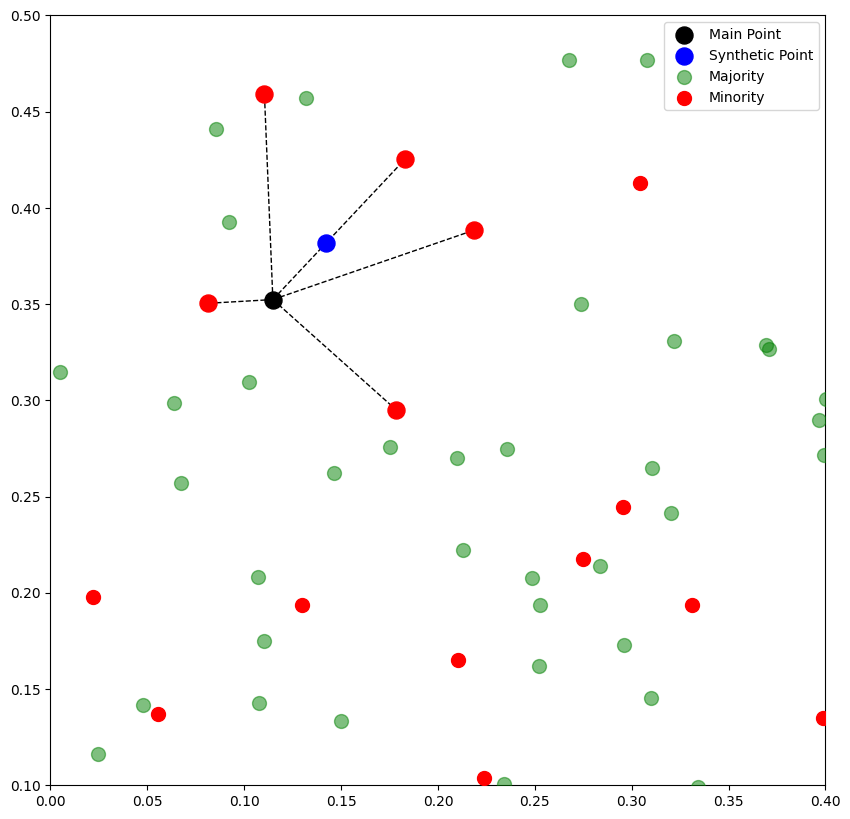

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Set the seed for reproducibility
np.random.seed(2)

# Generate 80 random points within the specified square
X = np.random.rand(85, 2) * 0.5

# Divide the points into majority and minority groups
indices = np.arange(85)
np.random.shuffle(indices)
majority_indices = indices[:60]
minority_indices = indices[60:]

# Set up the plot
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Define the main point and its 5 neighbors
main_point = np.array([0.11478701, 0.35231375])
neighbors = np.array([
    [0.11041896, 0.45922932],
    [0.0811493, 0.35037617],
    [0.1831712, 0.42542525],
    [0.21837363, 0.38827959],
    [0.17856747, 0.294891]
])

# Plot the main point
plt.scatter(main_point[0], main_point[1], color='black', s=150, zorder=6, label='Main Point')
plt.scatter(0.142140686, 0.38155835, color='blue', s=150, zorder=6, label='Synthetic Point')

# Plot the neighbors and the segments
for neighbor in neighbors:
    plt.scatter(neighbor[0], neighbor[1], color='red', s=150, zorder=6)
    plt.plot([main_point[0], neighbor[0]], [main_point[1], neighbor[1]], color='black', linestyle='--', linewidth=1)


# Plot the majority and minority points with different colors
for idx, (x, y) in enumerate(X):
    if idx in majority_indices:
        point_color = 'green'
        plt.scatter(x, y, color=point_color, s=100, zorder=5, alpha=0.5, label='Majority' if idx == majority_indices[0] else "")
    else:
        point_color = 'red'
        plt.scatter(x, y, color=point_color, s=100, zorder=5, label='Minority' if idx == minority_indices[0] else "")

# Set the limits to zoom into the area (0,0) to (0.4,0.4)
plt.xlim(0, 0.4)
plt.ylim(0.1, 0.5)

plt.legend()
#plt.title('Majority and Minority Points within (0,0), (0.4,0.4)')
plt.show()
